<a href="https://colab.research.google.com/github/SOWMIYA-AB/student_scores_project/blob/main/Mall_Customers_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧮 Mall Customer Segmentation using K-Means Clustering
**Name:** sowmii
**Dataset:** Mall Customer Segmentation Data (Kaggle)  
**Objective:** To group mall customers into distinct segments based on their annual income and spending score using K-Means clustering.


In [3]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [5]:
import zipfile

with zipfile.ZipFile("archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall()  # extracts contents into current directory


In [6]:
import os
os.listdir()


['.config', 'archive (2).zip', 'Mall_Customers.csv', 'sample_data']

In [7]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [9]:
# Use only the numerical features for 2D clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


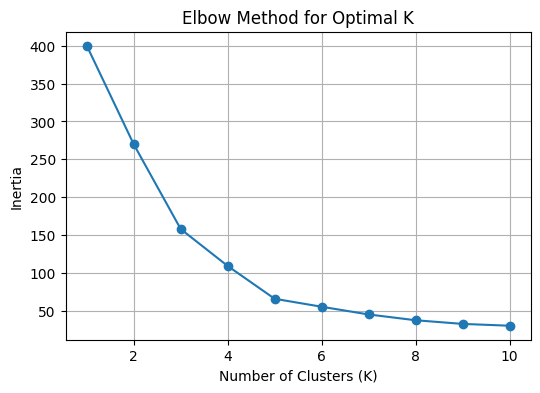

In [10]:
inertia = []  # list to store inertia values

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [11]:
best_k = 5  # replace with your chosen value from elbow plot
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = labels
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


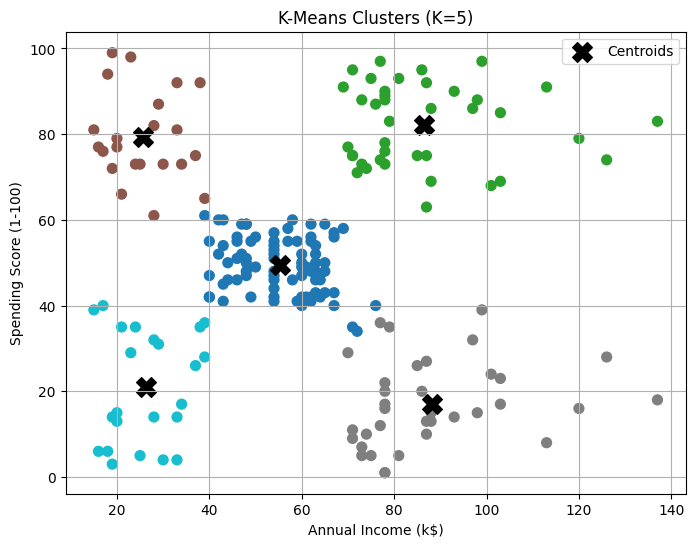

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=50)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='black', label='Centroids')
plt.title(f'K-Means Clusters (K={best_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(2)


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.72,55.30,49.52
1,32.69,86.54,82.13
2,25.27,25.73,79.36
3,41.11,88.20,17.11
4,45.22,26.30,20.91


### Insights

1. The Elbow Method suggested **K = 5** as the best number of clusters.
2. Cluster 1 represents **young, high-income, high-spending** customers — ideal for premium targeting.
3. Cluster 3 shows **wealthy but low-spending** customers — need engagement strategies.
4. Cluster 2 includes **young, low-income but high-spending** customers — good for trendy, low-cost offers.
5. Clusters 0 and 4 are **moderate or low spenders**, representing average and budget-conscious customers.


In [14]:
print("Cluster counts:\n", df['Cluster'].value_counts())


Cluster counts:
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


### 🏁 Final Conclusion & Findings

Using **K-Means clustering**, customers were grouped into **five distinct segments** based on their **annual income** and **spending behavior**.  
The Elbow Method indicated that **K = 5** gives the optimal cluster separation.  

The clusters represent:
- **Cluster 0:** Moderate-income, average-spending customers (majority group).  
- **Cluster 1:** Young, high-income, high-spending customers — *premium shoppers*.  
- **Cluster 2:** Young, low-income but high-spending customers — *trendy impulsive buyers*.  
- **Cluster 3:** Wealthy but low-spending customers — *potential targets for engagement*.  
- **Cluster 4:** Low-income, low-spending customers — *budget-conscious group*.  

This segmentation helps businesses **design personalized marketing strategies**, allocate resources efficiently, and enhance customer satisfaction through better-targeted offers.
